<a href="https://colab.research.google.com/github/KhobaibAkmal/KhobaibAkmal/blob/main/Demand_Forecasting_For_Stores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd

In [81]:
df = pd.read_csv('train.csv')

In [82]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [83]:
df[['day','month','year']] = df['week'].str.split('/',expand=True)

In [84]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12,09,07,13


**Basic Pre-processing**

In [85]:
df = df.drop('week',axis=1)

In [86]:
df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,9984,547934,141.7875,191.6625,0,1,12,09,07,13


**Defining the Features (X) and the targets (y), along with train-test sets**

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define input features (X) by dropping the 'units_sold' column
X = df.drop('units_sold', axis=1)

# Define the target variable (y) as 'units_sold'
y = df['units_sold']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

**Model Training using the Random Forest Regressor model**

In [88]:
# Initialize the Random Forest Regressor model, using all available CPU cores (-1)
model = RandomForestRegressor(n_jobs=-1)

# Fit (train) the model using the training data
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

**Evaluating the Baseline model using R-squared score & RMS Error value.**

In [89]:
# Evaluate the model's performance on the test data using the R-squared score
model.score(X_test, y_test)

0.7801565309866426

In [90]:
from sklearn.metrics import root_mean_squared_error

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = root_mean_squared_error(y_test, predictions)
print(f"RMSE: {rmse}")

RMSE: 26.85766478330511


**Crucial insight about the variance in the input data**

In [91]:
# Get descriptive statistics for the 'units_sold' column
df['units_sold'].describe()

,units_sold
count,150150.000000
mean,51.674206
std,60.207904
min,1.000000
25%,20.000000
50%,35.000000
75%,62.000000
max,2876.000000


<Axes: >

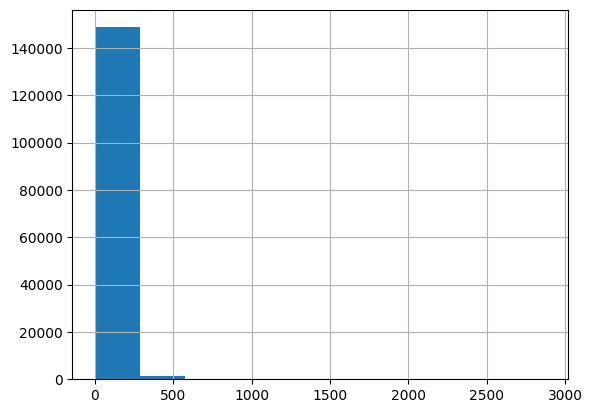

In [92]:
# Plot a histogram of the 'units_sold' column to visualize its distribution
df['units_sold'].hist()

**Visualizing the performance of model's predictive abilites.**

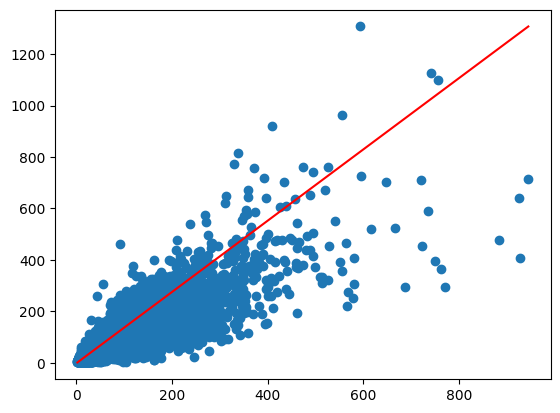

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot of predictions (x-axis) against actual values (y-axis)
plt.scatter(predictions, y_test)

# Plot a red identity line (ideal prediction) for comparison
plt.plot(np.linspace(predictions.min(), predictions.max(), 100),
         np.linspace(y_test.min(), y_test.max(), 100),
         color='red')
plt.show()


**Optimizing the dataframe & ultimately the model.**

Handling the outliers in the 'units_sold' column (keeping only upto the 99th percentile)

In [94]:
df = df[df['units_sold']<=df['units_sold'].quantile(0.99)]

In [95]:
df['units_sold'].describe()

,units_sold
count,148652.000000
mean,47.867926
std,42.965254
min,1.000000
25%,19.000000
50%,35.000000
75%,61.000000
max,283.000000


<Axes: >

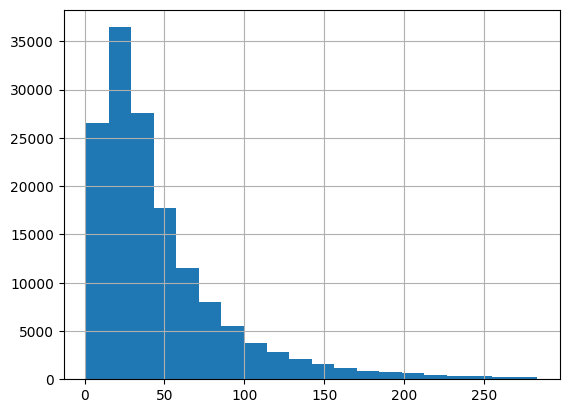

In [96]:
df['units_sold'].hist(bins=20)

Dropping the less relevant column

In [97]:
# Drop 'record_ID' as it's just a row number and provides no predictive information
df = df.drop('record_ID',axis=1)

In [98]:
df

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


Evaluating the use-case of SKU ID & Store ID in the model training

In [99]:
df['store_id'].nunique()

76

In [100]:
df['sku_id'].nunique()

28

Applying One-hot encoding to these features.

In [101]:
store_dummies = pd.get_dummies(df['store_id'], prefix='store', dtype=int)
df = df.join(store_dummies)
df = df.drop('store_id', axis=1)

sku_dummies = pd.get_dummies(df['sku_id'], prefix='item', dtype=int)
df = df.join(sku_dummies)
df = df.drop('sku_id', axis=1)

In [102]:
df

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,store_8023,store_8058,...,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
0,99.0375,111.8625,0,0,20,17,01,11,0,0,...,0,0,0,0,0,0,0,0,0,0
1,99.0375,99.0375,0,0,28,17,01,11,0,0,...,0,0,0,0,0,0,0,0,0,0
2,133.9500,133.9500,0,0,19,17,01,11,0,0,...,0,0,0,0,0,0,0,0,0,0
3,133.9500,133.9500,0,0,44,17,01,11,0,0,...,0,0,0,0,0,0,0,0,0,0
4,141.0750,141.0750,0,0,52,17,01,11,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,38,09,07,13,0,0,...,0,0,0,0,0,0,0,0,0,0
150146,235.8375,235.8375,0,0,30,09,07,13,0,0,...,0,0,0,0,0,0,0,0,0,0
150147,357.6750,483.7875,1,1,31,09,07,13,0,0,...,0,0,0,0,0,0,0,0,0,0
150148,141.7875,191.6625,0,1,12,09,07,13,0,0,...,0,0,0,0,0,0,1,0,0,0


**Defining the new Model**

In [103]:
X = df.drop('units_sold', axis=1)
y = df['units_sold']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
# Initialize and train the RandomForestRegressor model (with pre-processed data)
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

Evaluating the newer model

In [108]:
# Evaluate the model's performance on the test data using the R-squared score
model.score(X_test, y_test)

0.8278824848627775

In [109]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = root_mean_squared_error(y_test, predictions)
print(f"RMSE: {rmse}")

RMSE: 17.916066444123402


**Scatter Plot for the model's prediction performance.**

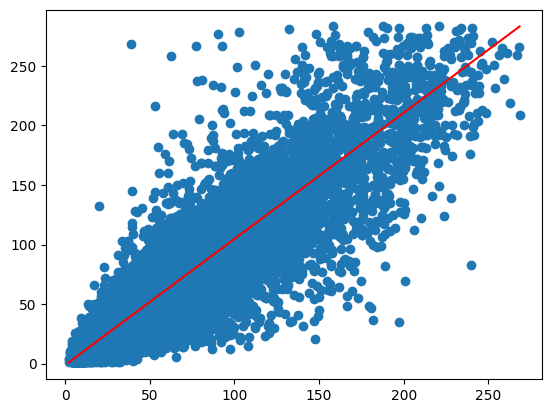

In [110]:
plt.scatter(predictions, y_test)

plt.plot(np.linspace(predictions.min(), predictions.max(), 100),
         np.linspace(y_test.min(), y_test.max(), 100),
         color='red')
plt.show()

**Hyperparameter Tuning using Grid Search Cross-Validation (TriFold)**

In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200],
    'min_samples_split': [2, 5,10]
}

model = RandomForestRegressor(n_jobs=-1)
grid_search = GridSearchCV(model, param_grid, cv=3, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ..............min_samples_split=2, n_estimators=100; total time=  24.7s
[CV] END ..............min_samples_split=2, n_estimators=100; total time=  25.0s
[CV] END ..............min_samples_split=2, n_estimators=100; total time=  24.9s
[CV] END ..............min_samples_split=2, n_estimators=150; total time=  35.7s
[CV] END ..............min_samples_split=2, n_estimators=150; total time=  36.0s
[CV] END ..............min_samples_split=2, n_estimators=150; total time=  37.0s
[CV] END ..............min_samples_split=2, n_estimators=200; total time=  48.4s
[CV] END ..............min_samples_split=2, n_estimators=200; total time=  47.4s
[CV] END ..............min_samples_split=2, n_estimators=200; total time=  48.5s
[CV] END ..............min_samples_split=5, n_estimators=100; total time=  22.1s
[CV] END ..............min_samples_split=5, n_estimators=100; total time=  22.3s
[CV] END ..............min_samples_split=5, n_est

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]},
             verbose=2)

**Calculating the 'best' estimator**

In [120]:
best_model = grid_search.best_estimator_

In [121]:
grid_search.best_params_

{'min_samples_split': 5, 'n_estimators': 200}

Here, the best parameter case for most optimised estimator model is shown above.

In [122]:
best_model.score(X_test, y_test)

0.8305772200796973

In [124]:
predictions = best_model.predict(X_test)
rmse = root_mean_squared_error(y_test, predictions)
print(f"RMSE: {rmse}")

RMSE: 17.775262884003013


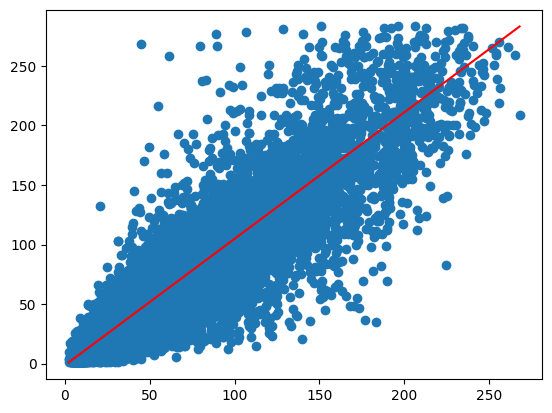

In [125]:
plt.scatter(predictions, y_test)

plt.plot(np.linspace(predictions.min(), predictions.max(), 100),
         np.linspace(y_test.min(), y_test.max(), 100),
         color='red')
plt.show()

Ultimately, the Scores of hyper-parameter tuned (GridSearchCV) estimator & that of newer baseline model, (0.8305, 0.8278 respectively) is very marginal, but the time-requirements for GridSearchCV were much higher. Hence, for a quick & yet close prediction, the newer baseline model is good.